In [1]:
#!/usr/bin/env python

import os, sys, glob
os.chdir('/camp/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto')
sys.path.append('/camp/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/')
from math import ceil
import argparse

import numpy as np
import pandas as pd
from tensorflow.keras.backend import clear_session
from skimage.morphology import diamond
from skimage.util import img_as_float32, img_as_uint, img_as_int
import skimage.io as io

from pyimcyto.anomaly_detection import process_anomalies, reprocess_unlikely_labels
from skimage.morphology import closing, remove_small_objects, remove_small_holes, area_closing
from pyimcyto.preprocess import *
from pyimcyto.models import nested_unet
from pyimcyto.postprocessing import (probability_basin_watershed_2, instance_closing)

from pickle import load
from preprocess import tilegen
import tensorflow as tf

%load_ext autoreload
%autoreload 2



2023-06-05 15:02:42.023632: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [33]:
from pyimcyto.seg import deepimcyto
weights = '/camp/lab/swantonc/working/Alastair/pipeline_tests/PHLEX_testing/deep-imcyto_weights'

dicy = deepimcyto(weights)

image_path = '/camp/project/proj-tracerx-lung/tctProjects/rubicon/tracerx/tx421/imc/outputs/PHLEX/release_20230518/results/deep-imcyto/p2/tx421_20220713/nuclear_preprocess/P2_TX421_TMA007_20220713-roi_8.png'
image = io.imread(image_path)

predictions = dicy.predict(image[:512,:512])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_126 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_61 (Dense)             (None, 7)                 112       
_________________________________________________________________
dropout_127 (Dropout)        (None, 7)                 0         
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 24        
_________________________________________________________________
dropout_128 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_63 (Dense)             (None, 7)               

/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 706 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  706 unique:  705
(512, 512, 704)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
704it [00:00, 735.04it/s]


maxgray =  706.0 unique:  705
Done.


In [75]:
dicy = deepimcyto(weights)
image_list = glob.glob('/camp/project/proj-tracerx-lung/tctProjects/rubicon/tracerx/tx421/imc/outputs/PHLEX/release_20230518/results/deep-imcyto/p2/tx421_20220713/nuclear_preprocess/P2_TX421_TMA007_2022*.png')
for i in image_list:
    image = io.imread(i)
    dicy.predict(image[:512,:512])

    


# predictions = dicy.predict(image[:512,:512])

Initialised deep-imcyto model.
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 297ms/step(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 1s 168ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 288ms/step(1, 512, 512, 1)
      2/Unknown - 0s 101ms/step(1, 512, 512, 1)
4/4 [==============================] - 1s 137ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 292ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 1s 137ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1180 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1180 unique:  1171
(512, 512, 1170)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
1170it [00:01, 728.15it/s]


maxgray =  1180.0 unique:  1170
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1217 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  819 unique:  3
(512, 512, 2)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
2it [00:00, 582.26it/s]

maxgray =  819.0 unique:  3
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1166 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      3/Unknown - 0s 113ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 144ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 24ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1080 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1080 unique:  1058
(512, 512, 1057)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1057it [00:01, 691.62it/s]


maxgray =  1080.0 unique:  1058
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1155 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  735 unique:  11
(512, 512, 10)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
10it [00:00, 695.86it/s]

maxgray =  735.0 unique:  11
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 16ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1061 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 145ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 101ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 136ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 711 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  711 unique:  710
(512, 512, 709)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


709it [00:00, 728.23it/s]


maxgray =  711.0 unique:  710
Done.
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1183 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1183 unique:  1179
(512, 512, 1178)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
1178it [00:01, 697.45it/s]


maxgray =  1183.0 unique:  1178
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1200 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  13 unique:  3
(512, 512, 2)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
2it [00:00, 566.22it/s]

maxgray =  13.0 unique:  3
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 16ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1177 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 114ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 141ms/step
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
(1, 512, 512, 1)
      2/Unknown - 0s 101ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 136ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1501 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1501 unique:  1494
(512, 512, 1493)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1493it [00:02, 732.14it/s]


maxgray =  1501.0 unique:  1493
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1532 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1183 unique:  11
(512, 512, 10)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
10it [00:00, 684.28it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1496 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1183.0 unique:  10
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 147ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 101ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1321 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1321 unique:  1302
(512, 512, 1301)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1301it [00:01, 670.87it/s]


maxgray =  1321.0 unique:  1302
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1378 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  451 unique:  9
(512, 512, 8)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
8it [00:00, 625.16it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1302 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  451.0 unique:  8
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 114ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 147ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 16ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 728 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  728 unique:  714
(512, 512, 713)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


713it [00:00, 727.20it/s]


maxgray =  728.0 unique:  714
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 738 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  106 unique:  7
(512, 512, 6)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
6it [00:00, 658.86it/s]

maxgray =  106.0 unique:  7
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 714 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 146ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1030 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1030 unique:  1028
(512, 512, 1027)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1027it [00:01, 729.85it/s]


maxgray =  1030.0 unique:  1028
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1026 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  992 unique:  5
(512, 512, 4)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
4it [00:00, 446.06it/s]

maxgray =  992.0 unique:  5
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 21ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1028 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 143ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 20ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 19ms/step(1, 512, 512, 1)
      2/Unknown - 0s 104ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 139ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 983 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  983 unique:  972
(512, 512, 971)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


971it [00:01, 708.78it/s]


maxgray =  983.0 unique:  972
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1029 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1023 unique:  22
(512, 512, 21)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
21it [00:00, 568.57it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 979 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1023.0 unique:  18
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 20ms/step(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 145ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 137ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 104ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 972 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  972 unique:  964
(512, 512, 963)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


963it [00:01, 725.55it/s]


maxgray =  972.0 unique:  964
Done.
segmaskdtype:  uint16
maxgray =  0 unique:  1
(512, 512, 0)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)
maxgray =  0.0 unique:  1
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step

/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 994 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 962 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 116ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 145ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1343 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1343 unique:  1332
(512, 512, 1331)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
1331it [00:01, 730.79it/s]


maxgray =  1343.0 unique:  1332
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1358 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  142 unique:  5
(512, 512, 4)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
4it [00:00, 452.86it/s]

maxgray =  142.0 unique:  5
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 20ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1333 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 113ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 142ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 19ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 19ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 139ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1572 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1572 unique:  1556
(512, 512, 1555)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1555it [00:02, 702.45it/s]


maxgray =  1572.0 unique:  1555
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1666 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1658 unique:  28
(512, 512, 27)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
27it [00:00, 675.58it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1567 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1658.0 unique:  27
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 145ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 139ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1609 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1609 unique:  1596
(512, 512, 1595)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1595it [00:02, 701.91it/s]


maxgray =  1609.0 unique:  1596
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1683 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1671 unique:  17
(512, 512, 16)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
16it [00:00, 702.90it/s]

maxgray =  1671.0 unique:  14



/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1599 fits in uint16
  return _convert(image, np.uint16, force_copy)


In [48]:
masks = dicy.prediction_masks

In [70]:
dicy = deepimcyto(weights)
dicy.gpus = 0
dicy.display()

Initialised deep-imcyto model.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~ deep-imcyto config ~~~~

~~~~~~~~~~~~~~~~~~~~~~~~~~~~
AE_weights                     /camp/lab/swantonc/working/Alastair/pipeline_tests/PHLEX_testing/deep-imcyto_weights/AE_weights.hdf5
COMPACTNESS                    0
COMS_CONFIDENCE                0.5
COMS_CONFIDENCE_LOW            0.125
MIN_OBJ_SIZE                   4
NUCLEUS_CONFIDENCE             0.5
THRESH_COM                     127.5
THRESH_COM_LOW                 31.875
THRESH_NUC                     127.5
WATERSHED_LINE                 False
boundary_weights               /camp/lab/swantonc/working/Alastair/pipeline_tests/PHLEX_testing/deep-imcyto_weights/boundaries.hdf5
com_weights                    /camp/lab/swantonc/working/Alastair/pipeline_tests/PHLEX_testing/deep-imcyto_weights/com.hdf5
error_images                   []
features                       ['area', 'eccentricity', 'euler_number', 'extent', 'feret_diameter_max', 'moments_hu-0', 'moments_hu-1'

In [71]:
for i in image_list:
    image = io.imread(i)
    dicy.predict(image[:512,:512])

(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 4s 4s/step(1, 512, 512, 1)
      2/Unknown - 7s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 13s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1174 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1207 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  816 unique:  3
(512, 512, 2)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
2it [00:00, 529.58it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1161 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  816.0 unique:  3
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1071 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1152 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  840 unique:  13
(512, 512, 12)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
12it [00:00, 690.19it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1054 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  840.0 unique:  13
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 706 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1176 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1190 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  13 unique:  3
(512, 512, 2)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
2it [00:00, 534.95it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1171 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  13.0 unique:  3
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1495 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1528 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1524 unique:  11
(512, 512, 10)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
10it [00:00, 656.51it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1491 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1524.0 unique:  10
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1315 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1364 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1364 unique:  18
(512, 512, 17)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
17it [00:00, 685.14it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1302 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1364.0 unique:  16
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 727 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 737 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  106 unique:  7
(512, 512, 6)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
6it [00:00, 637.34it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 713 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  106.0 unique:  7
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1027 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1022 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  989 unique:  5
(512, 512, 4)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
4it [00:00, 601.81it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1025 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  989.0 unique:  5
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 980 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1023 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1021 unique:  32
(512, 512, 31)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
31it [00:00, 709.17it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 983 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1021.0 unique:  28
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 970 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 991 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 959 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  0 unique:  1
(512, 512, 0)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)
maxgray =  0.0 unique:  1
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1333 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1354 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  142 unique:  5
(512, 512, 4)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
4it [00:00, 585.55it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1326 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  142.0 unique:  5
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1567 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1658 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1655 unique:  32
(512, 512, 31)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
31it [00:00, 706.49it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1567 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1655.0 unique:  31
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 3s 3s/step(1, 512, 512, 1)
      2/Unknown - 6s 3s/step(1, 512, 512, 1)
4/4 [==============================] - 12s 3s/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1601 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1675 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1673 unique:  25
(512, 512, 24)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
24it [00:00, 689.75it/s]

maxgray =  1673.0 unique:  19



/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1596 fits in uint16
  return _convert(image, np.uint16, force_copy)


Lossy conversion from int16 to uint8. Range [0, 32767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 32767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 32767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 32767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 32767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 32767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 32767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to uint8. Range [0, 32767]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int16 to u

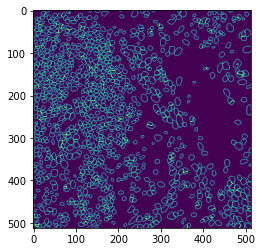

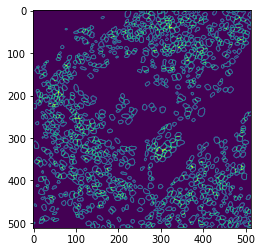

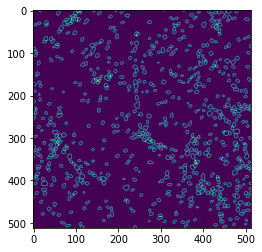

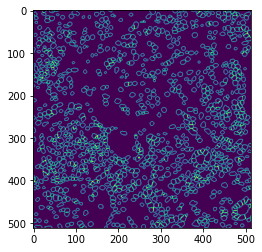

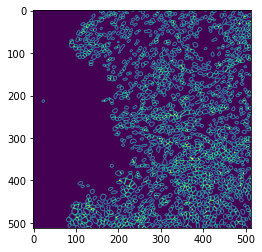

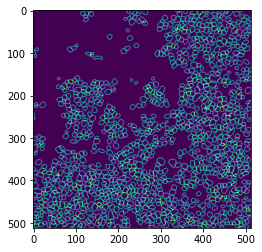

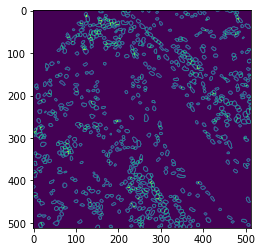

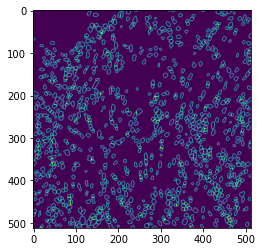

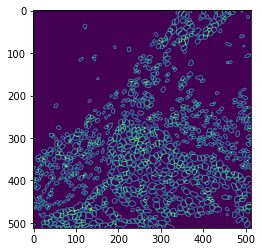

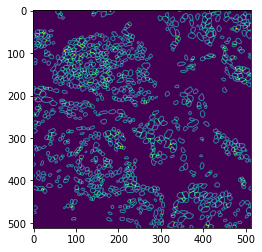

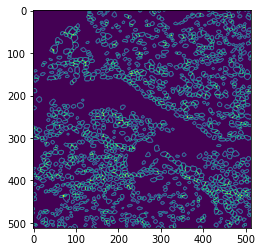

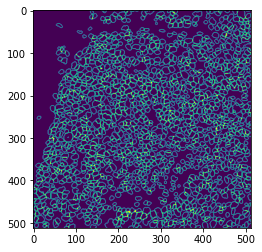

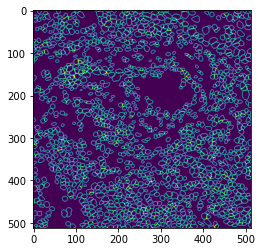

In [74]:
dicy.get_boundaries()
from skimage.util import img_as_int

for i, b in enumerate(dicy.prediction_boundaries):
    fig, ax = plt.subplots()
    ax.imshow(b)
    b = img_as_int(b)
    
    fname = image_list[i].split('/')[-1].split('.')[0]

    io.imsave(f'{outdir}/label_{fname}_boundaries.png', b)

In [61]:
dicy.NUCLEUS_CONFIDENCE = 0.4
image_list = glob.glob('/camp/project/proj-tracerx-lung/tctProjects/rubicon/tracerx/tx421/imc/outputs/PHLEX/release_20230518/results/deep-imcyto/p2/tx421_20220713/nuclear_preprocess/P2_TX421_TMA007_2022*.png')
for i in image_list:
    image = io.imread(i)
    dicy.predict(image[:512,:512])

(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 325ms/step(1, 512, 512, 1)
      2/Unknown - 0s 116ms/step(1, 512, 512, 1)
4/4 [==============================] - 1s 163ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 288ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 1s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 287ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 1s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1174 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1174 unique:  1166
(512, 512, 1165)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
1165it [00:01, 737.30it/s]


maxgray =  1174.0 unique:  1165
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1207 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  816 unique:  3
(512, 512, 2)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
2it [00:00, 551.27it/s]

maxgray =  816.0 unique:  3
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1161 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 114ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 142ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1071 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1071 unique:  1050
(512, 512, 1049)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1049it [00:01, 706.04it/s]


maxgray =  1071.0 unique:  1050
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1152 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  736 unique:  11
(512, 512, 10)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
10it [00:00, 682.62it/s]

maxgray =  736.0 unique:  11
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1054 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 144ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 16ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 706 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  706 unique:  705
(512, 512, 704)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


704it [00:00, 706.66it/s]


maxgray =  706.0 unique:  705
Done.
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 19ms/step(1, 512, 512, 1)
      2/Unknown - 0s 109ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 146ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 23ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1176 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1176 unique:  1172
(512, 512, 1171)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
1171it [00:01, 718.17it/s]


maxgray =  1176.0 unique:  1171
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1190 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  13 unique:  3
(512, 512, 2)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
2it [00:00, 590.91it/s]

maxgray =  13.0 unique:  3
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1170 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 142ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 139ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1495 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1495 unique:  1488
(512, 512, 1487)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1487it [00:02, 691.41it/s]


maxgray =  1495.0 unique:  1487
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1528 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1524 unique:  11
(512, 512, 10)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
10it [00:00, 684.64it/s]

maxgray =  1524.0 unique:  10
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1490 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 146ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1315 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1315 unique:  1297
(512, 512, 1296)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1296it [00:01, 730.10it/s]


maxgray =  1315.0 unique:  1297
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1364 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1364 unique:  13
(512, 512, 12)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
12it [00:00, 698.46it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1299 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1364.0 unique:  12
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 16ms/step(1, 512, 512, 1)
      2/Unknown - 0s 116ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 143ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 727 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  727 unique:  713
(512, 512, 712)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


712it [00:00, 733.79it/s]


maxgray =  727.0 unique:  713
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 737 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  106 unique:  7
(512, 512, 6)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
6it [00:00, 664.62it/s]

maxgray =  106.0 unique:  7
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 713 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 142ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1027 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1027 unique:  1025
(512, 512, 1024)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1024it [00:01, 730.89it/s]


maxgray =  1027.0 unique:  1025
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1022 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  989 unique:  5
(512, 512, 4)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
4it [00:00, 623.25it/s]

maxgray =  989.0 unique:  5
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1025 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 116ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 144ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 19ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 139ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 980 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  980 unique:  970
(512, 512, 969)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


969it [00:01, 729.22it/s]


maxgray =  980.0 unique:  970
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1023 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1021 unique:  29
(512, 512, 28)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
28it [00:00, 709.15it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 980 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1021.0 unique:  25
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 19ms/step(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 148ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 970 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  970 unique:  962
(512, 512, 961)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


961it [00:01, 679.51it/s]


maxgray =  970.0 unique:  962
Done.
segmaskdtype:  uint16
maxgray =  0 unique:  1
(512, 512, 0)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)
maxgray =  0.0 unique:  1
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 20ms/step

/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 991 fits in uint16
  return _convert(image, np.uint16, force_copy)
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 960 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 145ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 104ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 104ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 139ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1333 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1333 unique:  1325
(512, 512, 1324)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
1324it [00:01, 698.28it/s]


maxgray =  1333.0 unique:  1325
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1354 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  142 unique:  5
(512, 512, 4)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
4it [00:00, 646.22it/s]

maxgray =  142.0 unique:  5
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 19ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1326 fits in uint16
  return _convert(image, np.uint16, force_copy)


(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 148ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 104ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 139ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1567 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1567 unique:  1552
(512, 512, 1551)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1551it [00:02, 715.31it/s]


maxgray =  1567.0 unique:  1551
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1658 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1655 unique:  29
(512, 512, 28)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
28it [00:00, 684.37it/s]
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1564 fits in uint16
  return _convert(image, np.uint16, force_copy)


maxgray =  1655.0 unique:  28
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 18ms/step(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 146ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 103ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 138ms/step
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 17ms/step(1, 512, 512, 1)
      2/Unknown - 0s 104ms/step(1, 512, 512, 1)
4/4 [==============================] - 0s 139ms/step


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1601 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  1601 unique:  1589
(512, 512, 1588)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


1588it [00:02, 729.21it/s]


maxgray =  1601.0 unique:  1589
Done.


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 1675 fits in uint16
  return _convert(image, np.uint16, force_copy)


segmaskdtype:  uint16
maxgray =  1673 unique:  24
(512, 512, 23)
empty shape initial:  (512, 512)
empty shape pad:  (532, 532)
seg_mask shape pad:  (532, 532)


0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
23it [00:00, 712.70it/s]

maxgray =  1673.0 unique:  18



/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1595 fits in uint16
  return _convert(image, np.uint16, force_copy)


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: ../prediction_tests/dicy_with_anomaly_detect/label_P2_TX421_TMA007_20220713-roi_10_min_5_4_anomaly.tiff is a low contrast image
  
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: ../prediction_tests/dicy_with_anomaly_detect/label_P2_TX421_TMA007_20220713-roi_9_min_5_4_anomaly.tiff is a low contrast image
  
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: ../prediction_tests/dicy_with_anomaly_detect/label_P2_TX421_TMA007_20220713-roi_8_min_5_4_anomaly.tiff is a low contrast image
  
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: ../prediction_tests/dicy_with_anomaly_detect/label_P2_TX421_TMA007_20220713-roi_6_min_5_4_anomaly.tiff is a low contrast image
  
/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launche

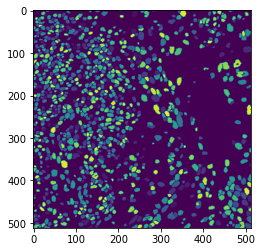

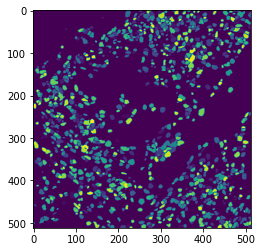

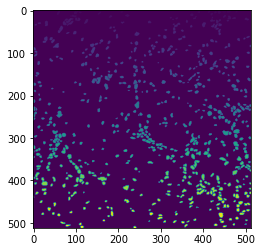

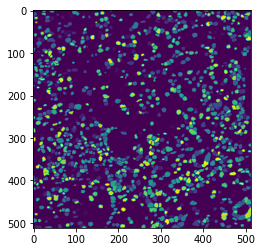

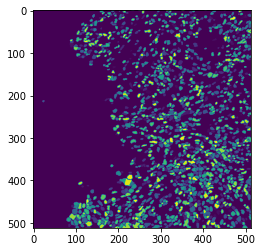

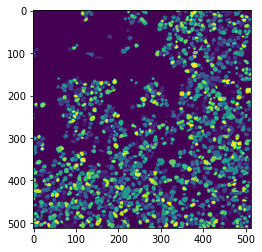

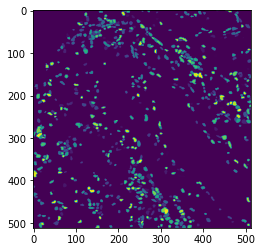

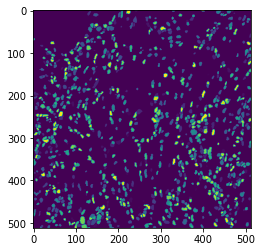

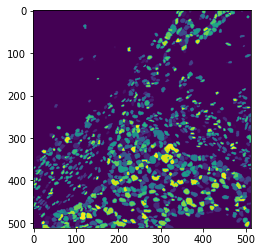

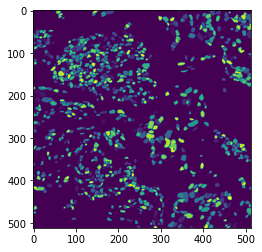

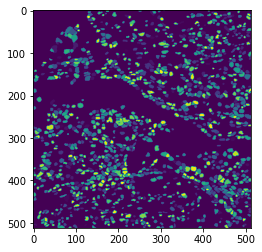

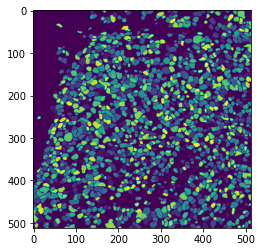

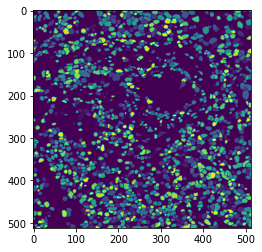

In [62]:
for i, mask in enumerate(masks):
    fig, ax = plt.subplots()
    ax.imshow(mask)
    fname = image_list[i].split('/')[-1].split('.')[0]

    io.imsave(f'{outdir}/label_{fname}_min_5_4_anomaly.tiff'.replace('.png', ''), mask)
    # print(len(masks))

In [63]:
print(dicy.NUCLEUS_CONFIDENCE)

0.4


In [53]:
dicy.NUCLEUS_CONFIDENCE = 0.4

In [54]:
print(dicy.NUCLEUS_CONFIDENCE)

0.4


In [50]:
x = dicy.randomise_labels(masks[0])

/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 1161 fits in uint16
  return _convert(image, np.uint16, force_copy)


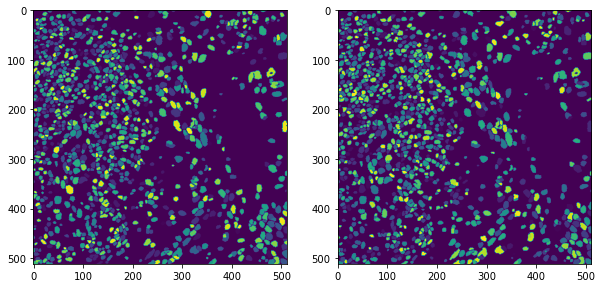

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax[0].imshow(masks[0])
ax[1].imshow(x)

In [ ]:
image.shape

(1200, 1200)

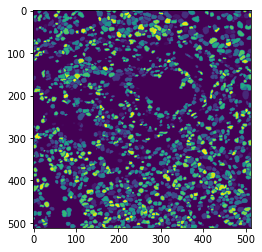

In [29]:
import matplotlib.pyplot as plt
                      
plt.imshow(predictions)

In [30]:
fname = os.path.basename(image_path)

outdir = f'../prediction_tests/dicy_with_anomaly_detect'
if not os.path.exists(outdir):
    os.makedirs(outdir)
    

io.imsave(f'{outdir}/label_{fname}_min_5_4_anomaly.tiff'.replace('.png', ''), predictions)

/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: ../prediction_tests/dicy_with_anomaly_detect/label_P2_TX421_TMA007_20220713-roi_7_min_5_4_anomaly.tiff is a low contrast image
  


In [19]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [62]:
def stitch_with_overlap(tiles, original_shape, tile_shape = (512, 512), overlap = (32, 32)):
    '''Stitch tiles back together with a defined overlap.'''

    # setup:
    offset = (tile_shape[0] - overlap[0], tile_shape[1] - overlap[1]) 
    r_tiles = int(math.ceil(original_shape[0]/(offset[1] * 1.0)))
    c_tiles = int(math.ceil(original_shape[1]/(offset[0] * 1.0)))

    print(f"r_tiles: {r_tiles}, c_tiles: {c_tiles}")

    stitched_shape = (r_tiles*tile_shape[1] - ((r_tiles-1)*overlap[1]), (c_tiles*tile_shape[1] - (c_tiles-1)*overlap[1]))
    print(f"stitched shape: {stitched_shape}")
    stitched = np.zeros(stitched_shape)

    # stitch tiles:
    for i in range(r_tiles):

        for j in range(c_tiles):
            # print(f"placing tile {i,j}")

            # if j < c_tiles - 1:
            r_min = offset[1]*i
            r_max = min(offset[1]*i+tile_shape[1], stitched_shape[0])
            c_min = offset[0]*j
            c_max = min(offset[0]*j+tile_shape[0], stitched_shape[1])
            stitched[r_min:r_max, c_min:c_max] = tiles[i*c_tiles + j, :, :, 0]
    
    # crop to original size:
    stitched = stitched[:original_shape[0], :original_shape[1]]

    return stitched

def predict_tiles(weights, image, tile_shape, overlap):
    if len(tf.config.list_physical_devices('GPU')) > 0:
        with tf.device('/GPU:0'):
            model = nested_unet(pretrained_weights = weights, input_size = tile_shape)
            testGene = tilegen(image, overlap=overlap)
            results = model.predict(testGene,1,verbose=1)
    else:
        with tf.device('/CPU:0'):
            model = nested_unet(pretrained_weights = weights, input_size = tile_shape)
            testGene = tilegen(image, overlap=overlap)
            results = model.predict(testGene,1,verbose=1)
    stitched = stitch_with_overlap(results, image.shape, tile_shape = tile_shape, overlap = overlap)
    return stitched

def predict_tiles_CPU(weights, image, tile_shape, overlap):
    with tf.device('/CPU:0'):
        model = nested_unet(pretrained_weights = weights, input_size = tile_shape)
        testGene = tilegen(image, overlap=overlap)
        results = model.predict(testGene,1,verbose=1)
    stitched = stitch_with_overlap(results, image.shape, tile_shape = tile_shape, overlap = overlap)
    return stitched

def anomaly_removal(label):
    # Remove anomalies:
    mask_refined, error_img, _ = process_anomalies(closed_im, AE_weights, morph_scaler, save_error_image = True, outdir = CONFIG.MSE_RESULTS_DIR, imagename = imagename)

    # if any elements of the error array are greater than the error cutoff (==1), reprocess the regions that have this large error, else use this refinec mask as the final one:
    if np.any(error_img > 1):
        mask_final = reprocess_unlikely_labels(mask_refined, error_img, boundary_im, nuc_im, com_im, CONFIG.THRESH_COM_LOW, CONFIG.THRESH_NUC, AE_weights, morph_scaler, randomise = True)
    else:
        mask_final = mask_refined

def predict(image,
            nuc_weights,
            boundary_weights, 
            com_weights,
            AE_weights,
            scaler,
            tile_shape = (512, 512, 1), 
            overlap = (1, 1), 
            instance_close = True,
            min_size = 5,
            error_thresh = 1,):

    nuc = predict_tiles(nuc_weights, image, tile_shape, overlap)
    boundary = predict_tiles(boundary_weights, image, tile_shape, overlap)
    com = predict_tiles(com_weights, image, tile_shape, overlap)

    thresh_nuc = 0.5 * np.amax(nuc)
    thresh_com = 0.5 * np.amax(com)
    thresh_com_low = 0.125 * np.amax(com)

    label = probability_basin_watershed_2(nuc, boundary, com, 
                                            thresh_nuc = thresh_nuc, 
                                            thresh_com = thresh_com, 
                                            min_obj_size = min_size, 
                                            compactness = 0)

    if instance_closing:
        
        # Perform instance closing:
        selem = diamond(1)
        print("Performing instance closing...")
        label = instance_closing(label, strel = selem)
        print('Done.')
    
    # Perform anomaly detection:
    label,error_img,_ = process_anomalies(label, 
            AE_weights, 
            scaler, 
            save_error_image = False)
    
    # if any elements of the error array are greater than the error cutoff (==1), reprocess the regions that have this large error, else use this refinec mask as the final one:
    if np.any(error_img > error_thresh):
        label = reprocess_unlikely_labels(label, error_img, boundary, nuc, com, thresh_com_low, thresh_nuc, AE_weights, scaler, randomise = True)
    else:
        label = label

    return label

def predict_CPU(image,nuc_weights,boundary_weights, com_weights, tile_shape = (512, 512, 1), overlap = (1, 1)):
    nuc = predict_tiles_CPU(nuc_weights, image, tile_shape, overlap)
    boundary = predict_tiles_CPU(boundary_weights, image, tile_shape, overlap)
    com = predict_tiles_CPU(com_weights, image, tile_shape, overlap)

    thresh_nuc = 0.5 * np.amax(nuc)
    thresh_com = 0.5 * np.amax(com)
    thresh_com_low = 0.125 * np.amax(com)

    label = probability_basin_watershed_2(nuc, boundary, com, 
                                            thresh_nuc = thresh_nuc, 
                                            thresh_com = thresh_com, 
                                            min_obj_size = 5, 
                                            compactness = 0)
    return label

In [61]:
overlap = (128, 128)
image_path = '/camp/project/proj-tracerx-lung/tctProjects/rubicon/tracerx/tx421/imc/outputs/PHLEX/release_20230518/results/deep-imcyto/p2/tx421_20220713/nuclear_preprocess/P2_TX421_TMA007_20220713-roi_7.png'
image = io.imread(image_path)

instance_close = True
weights = '/camp/lab/swantonc/working/Alastair/pipeline_tests/PHLEX_testing/deep-imcyto_weights'
nuc_weights = os.path.join(weights, 'nucleus_edge_weighted.hdf5')
com_weights = os.path.join(weights, 'com.hdf5')
AE_weights = os.path.join(weights, 'AE_weights.hdf5')
boundary_weights = os.path.join(weights, 'boundaries.hdf5')
scaler_path = os.path.join(weights, 'nuclear_morph_scaler.pkl')
morph_scaler = load(open(scaler_path, 'rb'))

result = predict(image, nuc_weights, boundary_weights, com_weights, AE_weights, morph_scaler, overlap = overlap, instance_close = instance_close)
fname = os.path.basename(image_path)

outdir = f'../prediction_tests/close_{instance_close}'
if not os.path.exists(outdir):
    os.makedirs(outdir)
    

io.imsave(f'{outdir}/label_{fname}_{overlap}_min_5_4_anomaly.tiff'.replace('.png', ''), result)

(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 305ms/step(1, 512, 512, 1)
      2/Unknown - 0s 115ms/step(1, 512, 512, 1)
      3/Unknown - 1s 114ms/step(1, 512, 512, 1)
      4/Unknown - 1s 110ms/step(1, 512, 512, 1)
      5/Unknown - 1s 108ms/step(1, 512, 512, 1)
      6/Unknown - 1s 107ms/step(1, 512, 512, 1)
      7/Unknown - 1s 106ms/step(1, 512, 512, 1)
      8/Unknown - 1s 105ms/step(1, 512, 512, 1)
      9/Unknown - 1s 105ms/step(1, 512, 512, 1)
     10/Unknown - 1s 105ms/step(1, 512, 512, 1)
     11/Unknown - 1s 104ms/step(1, 512, 512, 1)
     12/Unknown - 1s 104ms/step(1, 512, 512, 1)
     13/Unknown - 2s 104ms/step(1, 512, 512, 1)
     14/Unknown - 2s 104ms/step(1, 512, 512, 1)
16/16 [==============================] - 2s 113ms/step
r_tiles: 4, c_tiles: 4
stitched shape: (1664, 1664)
(1, 512, 512, 1)
(1, 512, 512, 1)
      1/Unknown - 0s 296ms/step(1, 512, 512, 1)
      2/Unknown - 0s 102ms/step(1, 512, 512, 1)
      3/Unknown - 1s 102ms/step(1, 512, 512, 1)
      4/U

/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 7938 fits in uint16
  return _convert(image, np.uint16, force_copy)


Performing instance closing...
segmaskdtype:  uint16
maxgray =  7938 unique:  7859
(1200, 1200, 7858)
empty shape initial:  (1200, 1200)
empty shape pad:  (1220, 1220)
seg_mask shape pad:  (1220, 1220)


0it [00:00, ?it/s]/camp/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
7858it [00:13, 585.76it/s]


maxgray =  7938.0 unique:  7854
Done.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_164 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 112       
_________________________________________________________________
dropout_165 (Dropout)        (None, 7)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 24        
_________________________________________________________________
dropout_166 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_28 (Dense)

/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 8343 fits in uint16
  return _convert(image, np.uint16, force_copy)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_168 (Dropout)        (None, 15)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 7)                 112       
_________________________________________________________________
dropout_169 (Dropout)        (None, 7)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 24        
_________________________________________________________________
dropout_170 (Dropout)        (None, 3)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 7)                

0it [00:00, ?it/s]/nemo/project/proj-tracerx-lung/tctProjects/rubicon/PHLEX/development/deep_imcyto_python/py-imcyto/pyimcyto/postprocessing.py:274: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  instance_closed = remove_small_holes(instance_closed, area_threshold=min_size, connectivity=1)
111it [00:00, 188.93it/s]


maxgray =  7857.0 unique:  103


/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int64 to uint16 without scaling because max value 7912 fits in uint16
  return _convert(image, np.uint16, force_copy)


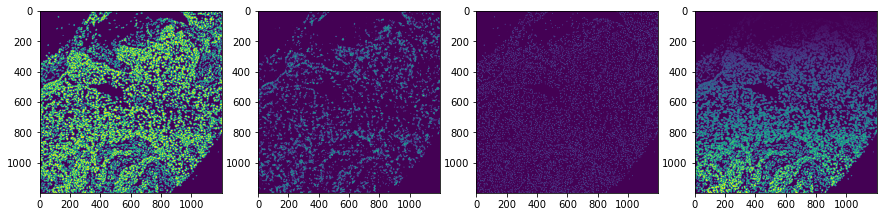

In [91]:
fig, ax = plt.subplots(1, 4, figsize = (15, 15))
ax[0].imshow(nuc_results)
ax[1].imshow(boundary_results)
ax[2].imshow(com_results)
ax[3].imshow(result)

In [83]:
thresh_nuc = 0.5 * np.amax(nuc_results)
thresh_com = 0.5 * np.amax(com_results)

label = probability_basin_watershed_2(nuc_results, boundary_results, com_results, 
                                        thresh_nuc = thresh_nuc, 
                                        thresh_com = thresh_com, 
                                        min_obj_size = 4, 
                                        compactness = 0)

/camp/home/magnesa/.conda/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:482: UserWarning: Downcasting int32 to uint16 without scaling because max value 6832 fits in uint16
  return _convert(image, np.uint16, force_copy)


In [82]:
from skimage.util import img_as_float
np.amax(nuc_results)

0.9885214567184448

In [84]:
io.imsave(f'{outdir}/boundary{fname}', boundary_results)
io.imsave(f'{outdir}/nucleus{fname}', nuc_results)
io.imsave(f'{outdir}/com{fname}', com_results)
label = img_as_uint(label)
io.imsave(f'{outdir}/label_.tiff', label)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


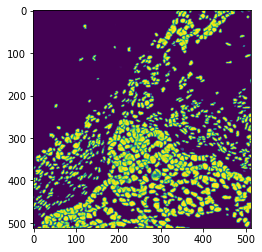

In [44]:
plt.imshow(nuc_results[0])

Lossy conversion from int16 to uint8. Range [0, 32391]. Convert image to uint8 prior to saving to suppress this warning.


r_tiles: 3, c_tiles: 3
stitched shape: (1534, 1534)
placing tile (0, 0)
placing tile (0, 1)
placing tile (0, 2)
placing tile (1, 0)
placing tile (1, 1)
placing tile (1, 2)
placing tile (2, 0)
placing tile (2, 1)
placing tile (2, 2)


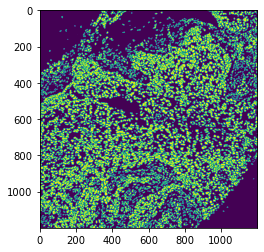

In [35]:
import matplotlib.pyplot as plt

def stitch_with_overlap(tiles, original_shape, tile_shape = (512, 512), overlap = (32, 32)):
    '''Stitch tiles back together with a defined overlap.'''

    # setup:
    offset = (tile_shape[0] - overlap[0], tile_shape[1] - overlap[1]) 
    r_tiles = int(math.ceil(original_shape[0]/(offset[1] * 1.0)))
    c_tiles = int(math.ceil(original_shape[1]/(offset[0] * 1.0)))

    print(f"r_tiles: {r_tiles}, c_tiles: {c_tiles}")

    stitched_shape = (r_tiles*tile_shape[1] - ((r_tiles-1)*overlap[1]), (c_tiles*tile_shape[1] - (c_tiles-1)*overlap[1]))
    print(f"stitched shape: {stitched_shape}")
    stitched = np.zeros(stitched_shape)

    # stitch tiles:
    for i in range(r_tiles):

        for j in range(c_tiles):
            print(f"placing tile {i,j}")

            # if j < c_tiles - 1:
            r_min = offset[1]*i
            r_max = min(offset[1]*i+tile_shape[1], stitched_shape[0])
            c_min = offset[0]*j
            c_max = min(offset[0]*j+tile_shape[0], stitched_shape[1])
            stitched[r_min:r_max, c_min:c_max] = tiles[i*c_tiles + j, :, :, 0]
    
    # crop to original size:
    stitched = stitched[:original_shape[0], :original_shape[1]]

    return stitched
    

stitched_prediction = stitch_with_overlap(results, image.shape, tile_shape = (512, 512), overlap = overlap)
stitched_prediction = img_as_int(stitched_prediction)
fname = os.path.basename(image_path)
fname = fname.replace('.png', f'overlap_{overlap}_nuc.png')
outdir = '../prediction_tests'
if not os.path.exists(outdir):
    os.makedirs(outdir)

io.imsave(f'{outdir}/{fname}', stitched_prediction)

plt.imshow(stitched_prediction)
# for x in stitch_with_overlap(results, (1472,1472), tile_shape = (512, 512), overlap = (32, 32)):
#     fig, ax = plt.subplots()
#     plt.imshow(x)

In [33]:
stitched_prediction = img_as_int(stitched_prediction)
fname = os.path.basename(image_path)
fname = fname.replace('.png', '_nuc.png')
outdir = '../prediction_tests'
if not os.path.exists(outdir):
    os.makedirs(outdir)

io.imsave(f'{outdir}/{fname}', stitched_prediction)

Lossy conversion from int16 to uint8. Range [0, 32391]. Convert image to uint8 prior to saving to suppress this warning.


In [10]:
results.shape

(9, 512, 512, 1)

In [9]:
image.shape

(1200, 1200)

(1, 512, 512, 1)


TypeError: Invalid shape (1, 512, 512, 1) for image data

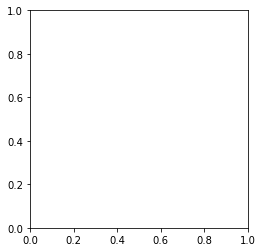

In [28]:
for x in tilegen(image):
    fig, ax = plt.subplots()
    plt.imshow(x)

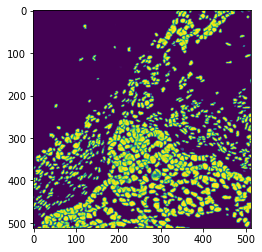

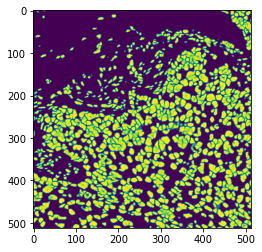

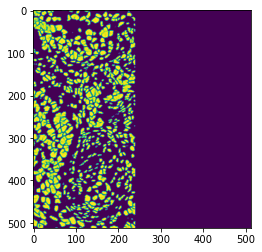

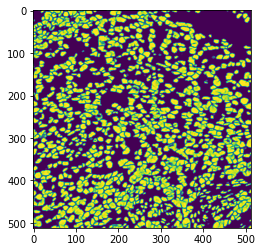

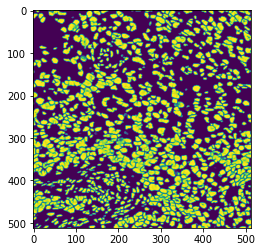

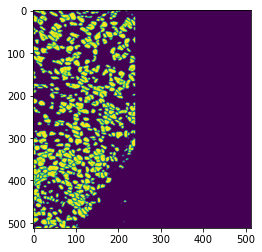

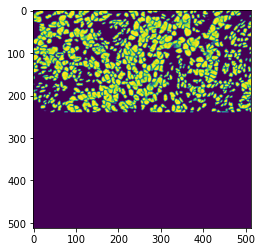

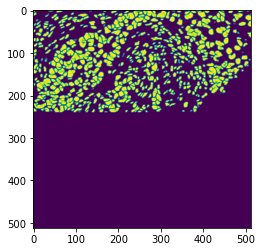

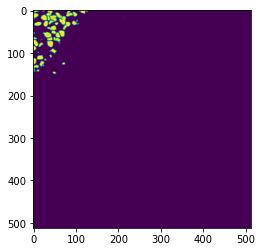

In [22]:

for i in range(results.shape[0]):
    fig, ax = plt.subplots(1,1)
    ax.imshow(results[i,:,:,0])


(1, 512, 512, 1)


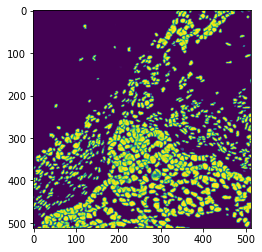

In [17]:
import matplotlib.pyplot as plt
print(results.shape)
plt.imshow(results[0])

In [3]:

image = io.imread('/camp/project/proj-tracerx-lung/tctProjects/rubicon/tracerx/tx421/imc/outputs/PHLEX/release_20230518/results/deep-imcyto/p2/tx421_20220713/nuclear_preprocess/P2_TX421_TMA007_20220713-roi_4.png')

weights = '/camp/lab/swantonc/working/Alastair/pipeline_tests/PHLEX_testing/deep-imcyto_weights'

nuc_weights = os.path.join(weights, 'nucleus_edge_weighted.hdf5')

tile_size = (512, 512)

results = predict_tiles(nuc_weights, image, tile_size)


ValueError: Input 0 of layer conv2d is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 512, 512)